### Importing Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following shows the dataset contains different encoding of the **utf-8** that is pandas' `read_csv()` default one.
Further below I show solutions to address this, which is a practive taught in Lesson 3.1 *ETL Pipelines*

In [6]:
file = 'C:\\Users\\Pedro Martinez\\Documents\\Stats\\Kaggle\\TopSpotifySongsFrom2010-2019.csv'
df = pd.read_csv(file)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 8: invalid start byte

#### Solution 1:

In [7]:
file = 'C:\\Users\\Pedro Martinez\\Documents\\Stats\\Kaggle\\TopSpotifySongsFrom2010-2019.csv'

In [8]:
import chardet 
file_ = file
with open(file_, 'rb') as file_:
    print(chardet.detect(file_.read()))

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [9]:
df=pd.read_csv(file, encoding='Windows-1252')

In [10]:
df.head(3)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80


In [11]:
df = df.drop(df.columns[0],axis=1)
df.head(3)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80


In [12]:
# Size of the dataset
df.shape

(603, 14)

### CRISP-DM:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


The dataset doesn't show missing values or need to transform any of the columns to a different format.

### How many songs are registered per year:

In [29]:
df.groupby(['year'])[['title']].count()

,title
year,
2010,51
2011,53
2012,35
2013,71
2014,58
2015,95
2016,80
2017,65
2018,64


### Most Popular Genres per year:

In [30]:
genre = df.groupby(['year','top genre'])[['title']].count()
genre = genre.sort_values(['year','title'],ascending=[True,False])
genre

title
year top genre             
2010 dance pop           31
     atl hip hop          3
     hip pop              3
     pop                  3
     australian pop       2
...                     ...
2019 brostep              1
     canadian pop         1
     edm                  1
     electronic trap      1
     latin                1

[147 rows x 1 columns]

In [31]:
genre_df = pd.DataFrame(columns=['year','top_genre','count'])

for i,year in enumerate(df.year.unique()):
    genre_df.loc[i,'year'] = year
    genre_df.loc[i,'top_genre'] = genre.loc[year,:].reset_index().iloc[0].values[0]
    genre_df.loc[i,'count'] = genre.loc[year,:].reset_index().iloc[0].values[1]

genre_df.set_index('year')

,top_genre,count
year,,
2010,dance pop,31
2011,dance pop,38
2012,dance pop,15
2013,dance pop,42
2014,dance pop,27
2015,dance pop,52
2016,dance pop,46
2017,dance pop,31
2018,dance pop,38


### Most Popular Singers per year:

In [32]:
artist = df.groupby(['year','artist'])[['title']].count()
artist = artist.sort_values(['year','title'],ascending=[True,False])
artist

title
year artist                    
2010 Christina Aguilera       4
     Kesha                    4
     The Black Eyed Peas      4
     Alicia Keys              3
     Lady Gaga                3
...                         ...
2019 R3HAB                    1
     SHAED                    1
     Sam Smith                1
     Selena Gomez             1
     Shawn Mendes             1

[409 rows x 1 columns]

In [33]:
artist_df = pd.DataFrame(columns=['year','top_artist','count'])

for i,year in enumerate(df.year.unique()):
    artist_df.loc[i,'year'] = year
    artist_df.loc[i,'top_artist'] = artist.loc[year,:].reset_index().iloc[0].values[0]
    artist_df.loc[i,'count'] = artist.loc[year,:].reset_index().iloc[0].values[1]

artist_df.set_index('year')

,top_artist,count
year,,
2010,Christina Aguilera,4
2011,Lady Gaga,5
2012,Katy Perry,3
2013,Justin Timberlake,4
2014,Birdy,4
2015,Justin Bieber,9
2016,Adele,4
2017,DNCE,3
2018,Shawn Mendes,4


In [34]:
df[df.artist=='Christina Aguilera']

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
36,Bound To You - Burlesque Original Motion Pictu...,Christina Aguilera,dance pop,2010,164,41,29,-5,13,7,264,83,3,61
40,Something's Got A Hold On Me - Burlesque Origi...,Christina Aguilera,dance pop,2010,150,85,51,-4,12,72,185,47,27,58
44,You Lost Me,Christina Aguilera,dance pop,2010,43,39,23,-6,14,7,257,85,4,56
45,Not Myself Tonight,Christina Aguilera,dance pop,2010,120,81,76,-5,56,54,186,0,4,55
300,Genie In a Bottle,Christina Aguilera,dance pop,2015,176,80,63,-7,14,91,218,21,16,72
424,Change,Christina Aguilera,dance pop,2016,82,54,62,-6,13,20,187,68,8,54


### Average Tempo of  Songs By Year:

In [15]:
temp = df.groupby(['year'])[['bpm']].mean().round(1)
temp = temp.sort_values(['year'],ascending=[True])
temp

,bpm
year,
2010,122.1
2011,119.1
2012,121.1
2013,121.7
2014,123.0
2015,119.8
2016,114.3
2017,116.8
2018,114.6


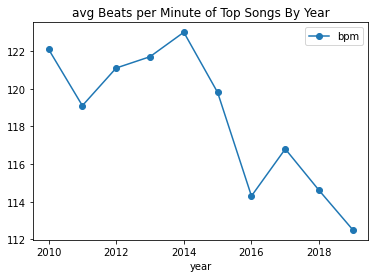

In [21]:
temp.plot(title='avg Beats per Minute of Top Songs By Year',marker='.',markersize=12);

### Average Length of  Songs By Year:

In [38]:
dur = df.groupby(['year'])[['dur']].mean().round(1)
dur = dur.sort_values(['year'],ascending=[True])
dur

,dur
year,
2010,229.8
2011,242.6
2012,224.4
2013,234.5
2014,224.2
2015,223.4
2016,220.2
2017,222.2
2018,217.2


In [39]:
# in Minutes
(dur/60).round(1)

,dur
year,
2010,3.8
2011,4.0
2012,3.7
2013,3.9
2014,3.7
2015,3.7
2016,3.7
2017,3.7
2018,3.6


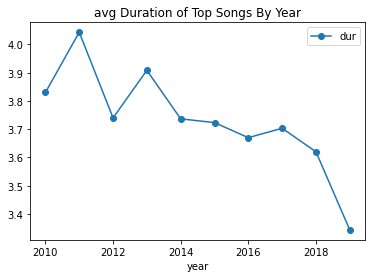

In [75]:
(dur/60).plot(title='avg Duration of Top Songs By Year',
              marker='.',markersize=12);

### Most Frequent Artist with Top Songs:

In [97]:
# Top 10
df.groupby(['artist'])['title'].count().sort_values(ascending=False).head(10)

artist
Katy Perry          17
Justin Bieber       16
Maroon 5            15
Rihanna             15
Lady Gaga           14
Bruno Mars          13
The Chainsmokers    11
Pitbull             11
Ed Sheeran          11
Shawn Mendes        11
Name: title, dtype: int64

### Most Popular Songs of the Decade:

In [42]:
# Top 10
df[['title','artist','year','pop']].sort_values(['pop'],ascending=False).head(10)

,title,artist,year,pop
572,Memories,Maroon 5,2019,99
573,Lose You To Love Me,Selena Gomez,2019,97
574,Someone You Loved,Lewis Capaldi,2019,96
575,Seёorita,Shawn Mendes,2019,95
576,How Do You Sleep?,Sam Smith,2019,93
578,Trampoline (with ZAYN),SHAED,2019,92
577,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,2019,92
580,Truth Hurts,Lizzo,2019,90
581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,2019,90
579,Happier,Marshmello,2019,90


### Most Popular Songs by Year:

In [43]:
top_songs = pd.DataFrame(columns=['title','artist','pop'],index=df.year.unique())
for i,year in enumerate(df.year.unique()):
    top_songs.loc[year,'title']  = df[['title','artist','pop']][df.year==year].sort_values('pop',ascending=False).iloc[0,0]
    top_songs.loc[year,'artist'] = df[['title','artist','pop']][df.year==year].sort_values('pop',ascending=False).iloc[0,1]
    top_songs.loc[year,'pop']    = df[['title','artist','pop']][df.year==year].sort_values('pop',ascending=False).iloc[0,2]

In [44]:
top_songs

,title,artist,pop
2010,"Hey, Soul Sister",Train,83
2011,A Thousand Years,Christina Perri,81
2012,Titanium (feat. Sia),David Guetta,80
2013,Underneath the Tree,Kelly Clarkson,88
2014,All of Me,John Legend,86
2015,Thinking out Loud,Ed Sheeran,84
2016,The Hills,The Weeknd,84
2017,Shape of You,Ed Sheeran,87
2018,One Kiss (with Dua Lipa),Calvin Harris,86
2019,Memories,Maroon 5,99


### Artist with Most Lyrics:

In [64]:
# Top 10
lyrics = df.groupby(['artist'])[['spch']].sum().sort_values(by='spch',ascending=False)
lyrics.head(10)

,spch
artist,
Justin Bieber,184
Nicki Minaj,157
Jennifer Lopez,131
Rihanna,109
Katy Perry,109
Justin Timberlake,107
Pitbull,106
Shawn Mendes,106
Ariana Grande,102


### Songs with the most and the least amount of lyrics:

In [102]:
df[['title','artist','val']].sort_values(by='val',ascending=False).head(10)

,title,artist,val
238,Mmm Yeah (feat. Pitbull),Austin Mahone,98
512,There's Nothing Holdin' Me Back,Shawn Mendes,97
324,All About That Bass,Meghan Trainor,96
213,"Happy - From ""Despicable Me 2""",Pharrell Williams,96
585,Sucker,Jonas Brothers,95
134,Don't Stop the Party (feat. TJR),Pitbull,95
313,Lips Are Movin,Meghan Trainor,95
215,Shake It Off,Taylor Swift,94
219,Treasure,Bruno Mars,94
302,Sing,Ed Sheeran,94


### Songs with the most and the least amount of lyrics:

In [46]:
# Top 10
df[['title','artist','spch']].sort_values(by='spch',ascending=False).head(10)

,title,artist,spch
200,How Ya Doin'? (feat. Missy Elliott),Little Mix,48
14,Like A G6,Far East Movement,45
364,Love Yourself,Justin Bieber,44
271,Love Yourself,Justin Bieber,44
266,I Luh Ya Papi,Jennifer Lopez,42
48,Castle Walls (feat. Christina Aguilera),T.I.,39
95,Castle Walls (feat. Christina Aguilera),T.I.,39
465,Crying in the Club,Camila Cabello,38
100,Moment 4 Life - Album Version (Edited),Nicki Minaj,38
542,Chun-Li,Nicki Minaj,37


In [47]:
# Least 10
df[['title','artist','spch']].sort_values(by='spch',ascending=True).head(10)

,title,artist,spch
442,Million Years Ago,Adele,0
536,Tequila,Dan + Shay,3
249,Say Something,A Great Big World,3
74,Without You (feat. Usher),David Guetta,3
250,A Sky Full of Stars,Coldplay,3
543,Sign of the Times,Harry Styles,3
444,Closer,The Chainsmokers,3
196,Anything Could Happen,Ellie Goulding,3
448,Let Me Love You,DJ Snake,3
552,For You (With Rita Ora),Liam Payne,3


### Danceable Genres (from least to most):

In [78]:
dnce_df = df.groupby('top genre')[['dnce']].mean().round(1).sort_values(by='dnce',ascending=False)
dnce_df

,dnce
top genre,
australian hip hop,91.0
alternative r&b,90.0
electro,81.0
canadian latin,80.0
canadian hip hop,78.0
danish pop,77.0
colombian pop,76.3
french indie pop,76.0
moroccan pop,75.0


### Barplot of Danceable Scores by Genre

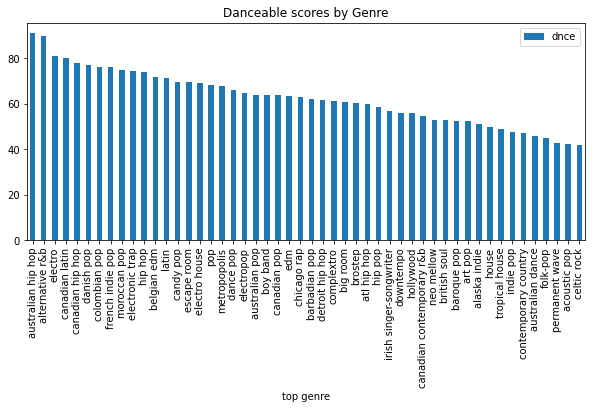

In [94]:
dnce_df.plot(kind='bar',figsize=(10,4));
plt.title('Danceable scores by Genre');

### Correlation among BpM, Energy, Danceability and Mood:

In [49]:
df[['bpm','nrgy','dnce','val']].corr()

,bpm,nrgy,dnce,val
bpm,1.000000,0.126170,-0.131301,0.016021
nrgy,0.126170,1.000000,0.167209,0.409577
dnce,-0.131301,0.167209,1.000000,0.501696
val,0.016021,0.409577,0.501696,1.000000


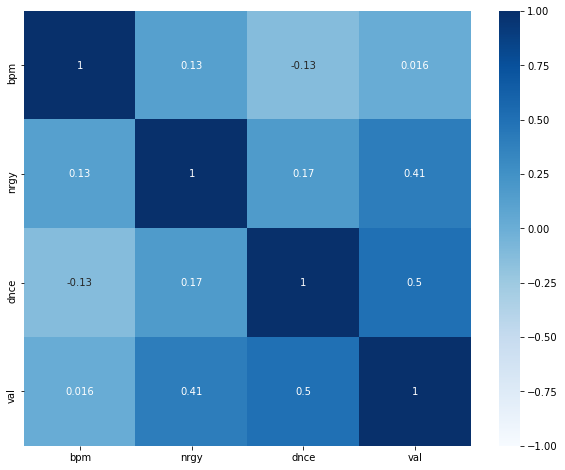

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['bpm','nrgy','dnce','val']].corr(), 
            annot=True,cmap = 'Blues', vmin=-1, vmax=1);

## Plots

In [50]:
import seaborn as sns

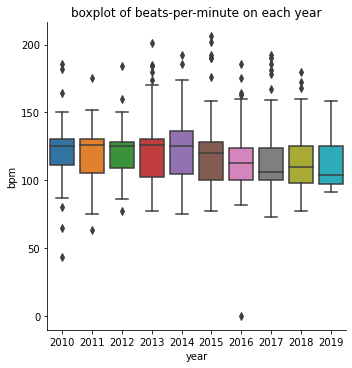

In [67]:
sns.catplot(y='bpm',x='year',kind='box',data=df)
plt.title('boxplot of beats-per-minute on each year');

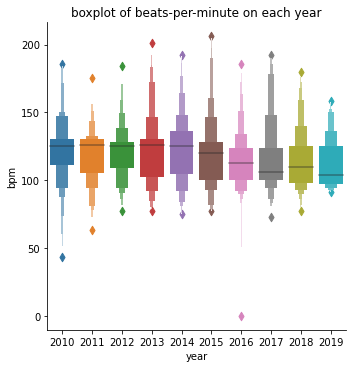

In [68]:
sns.catplot(y='bpm',x='year',kind='boxen',data=df)
plt.title('boxplot of beats-per-minute on each year');

In [71]:
df[df['bpm']==0]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
442,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


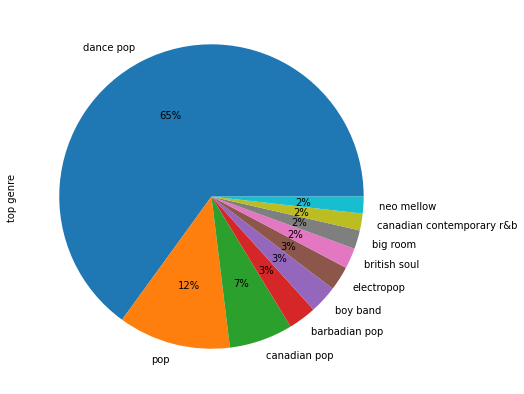

In [54]:
df['top genre'].value_counts().head(10).plot.pie(figsize=(10,7), autopct='%1.0f%%');

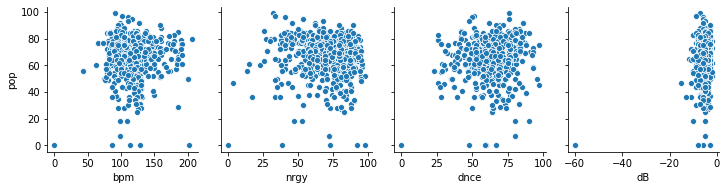

In [55]:
sns.pairplot(df, y_vars="pop", x_vars=['bpm', 'nrgy', 'dnce', 'dB']);

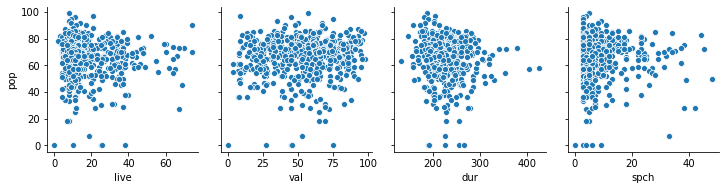

In [99]:
sns.pairplot(df, y_vars="pop", x_vars=['live', 'val', 'dur', 'spch']);

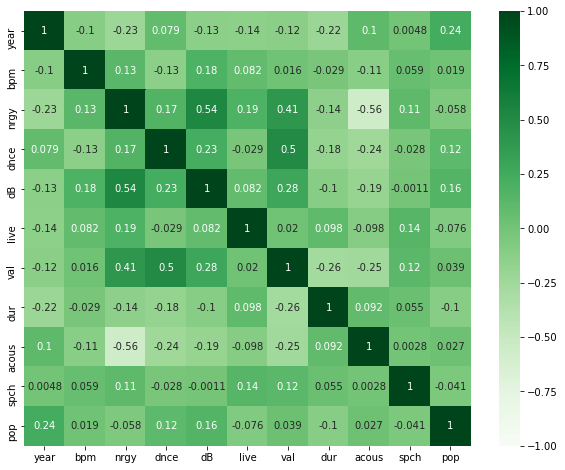

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap = 'Greens', vmin=-1, vmax=1);

Jointplot between Popularity and Value (bivariate and univariate graphs) 



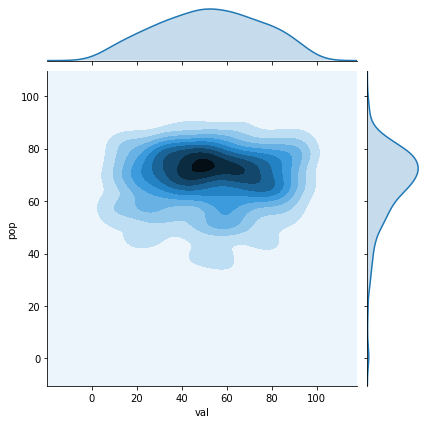

In [58]:
print('Jointplot between Popularity and Value (bivariate and univariate graphs) \n')
sns.jointplot(x='val', y='pop', data=df, kind="kde");

## WordCloud

In [59]:
from wordcloud import WordCloud

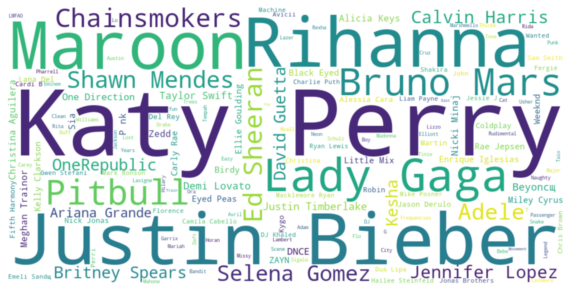

In [60]:
wordcloud = WordCloud(width = 1000, height = 500, max_font_size = 200, max_words = 150,background_color='white')\
            .generate(" ".join(df.artist))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='quadric')
plt.axis("off")
plt.show()